# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #3: Temporal Visualization

In this homework, you will be working with visualizations of stock data. To achieve this, we'll be using [``pandas``](https://pandas.pydata.org/docs/user_guide/10min.html) to get the specific information we want (e.g. closing price) from four datasets we've aggregated in the `datasets/` directory. We'll provide example code on how to load in the required data, but your task is to complete the code.

## Imports

**Don't modify this code**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Importing from dataset file

Below is a helper function that imports raw data from the url provided, performs some pre-processing to change the date format into DateTime, and returns the final dataframe. Feel free to use this helper function in your code implementation.

Below is an example of using the helper function to import the stock data from `./datasets/amzn.csv`:

In [2]:
def import_df(filename):
    df = pd.read_csv(filename)
    df['dates'] = pd.to_datetime(df['dates'], format='%Y-%m-%d')
    return df

example_df = import_df("amzn.csv")

Now that you have the dates and closing prices of AMZN in a dataframe, you can plot! Remember that you can access and plot a specific column of a dataframe with the following code logic:

```
x = df['x_axis']
y = df['y_axis']
plt.plot(x, y)
```

Below is an example using Amazon's raw stock data.

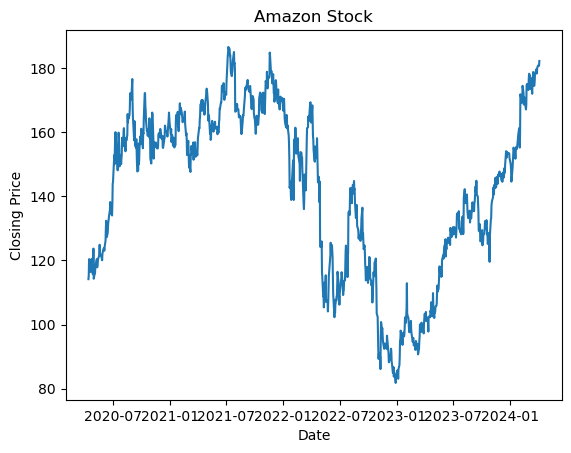

In [3]:
# Plot the dates vs. closing price for AMZN
fig = plt.figure()
plt.plot(example_df['dates'], example_df['closing price'])

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("Amazon Stock")
plt.show()

## Part 1: Curve-Based Visualization (5/15 points)

Temporally visualize the closing prices for the 1000 trading days of the 4 stocks as well as the mean (average) closing price across all 4 stocks for each day. Make sure to visualize all data in a single diagram. Color-code the plot so that each stock has a different color. Add a legend to let us know which plot represents which stock/data. An example is provided below:

In [4]:
# Part 1: Closing price of at least 4 stocks + the mean (or average) of those four stocks for the past 1000 trading days

In [5]:
# Load data from CSV files
meta_df = import_df("meta.csv")
goog_df = import_df("goog.csv")
amzn_df = import_df("amzn.csv") 
aapl_df = import_df("aapl.csv")
goog_df = import_df("goog.csv")

In [6]:
# Combine the four dataframes into a single dataframe with proper labeling
data_frames = [meta_df, amzn_df, aapl_df, goog_df]
all_stocks = pd.concat(data_frames, axis=1, keys=['Meta', 'Amazon', 'Apple', 'Google'])

# Since the data has multi-level columns, we need to adjust for calculating the mean closing price
all_stocks['Mean_Closing_Price'] = all_stocks.xs('closing price', axis=1, level=1).mean(axis=1)

# Reset the index to use 'dates' for plotting
all_stocks.reset_index(inplace=True, drop=True)
all_stocks.head()

Meta                             Amazon                           \
       dates closing price    volume      dates closing price     volume   
0 2020-04-14    177.981155  21011800 2020-04-14    114.166000  161744000   
1 2020-04-15    176.782425  17423000 2020-04-15    115.384003  137332000   
2 2020-04-16    176.063202  23593200 2020-04-16    120.409500  240764000   
3 2020-04-17    179.050034  20974800 2020-04-17    118.750000  158600000   
4 2020-04-20    178.051086  16110700 2020-04-20    119.680496  115414000   

       Apple                              Google                          \
       dates closing price     volume      dates closing price    volume   
0 2020-04-14     69.989937  194994800 2020-04-14     63.461498  49408000   
1 2020-04-15     69.351120  131154400 2020-04-15     63.123501  33434000   
2 2020-04-16     69.902161  157125200 2020-04-16     63.173500  50362000   
3 2020-04-17     68.953682  215250000 2020-04-17     64.162498  38980000   
4 2020-04-20     67.522430  130015200 2020-04-20     63.330502  33910000   

  Mean_Closing_Price  
                      
0         106.399648  
1         106.160262  
2         107.387091  
3         107.729053  
4         107.146129

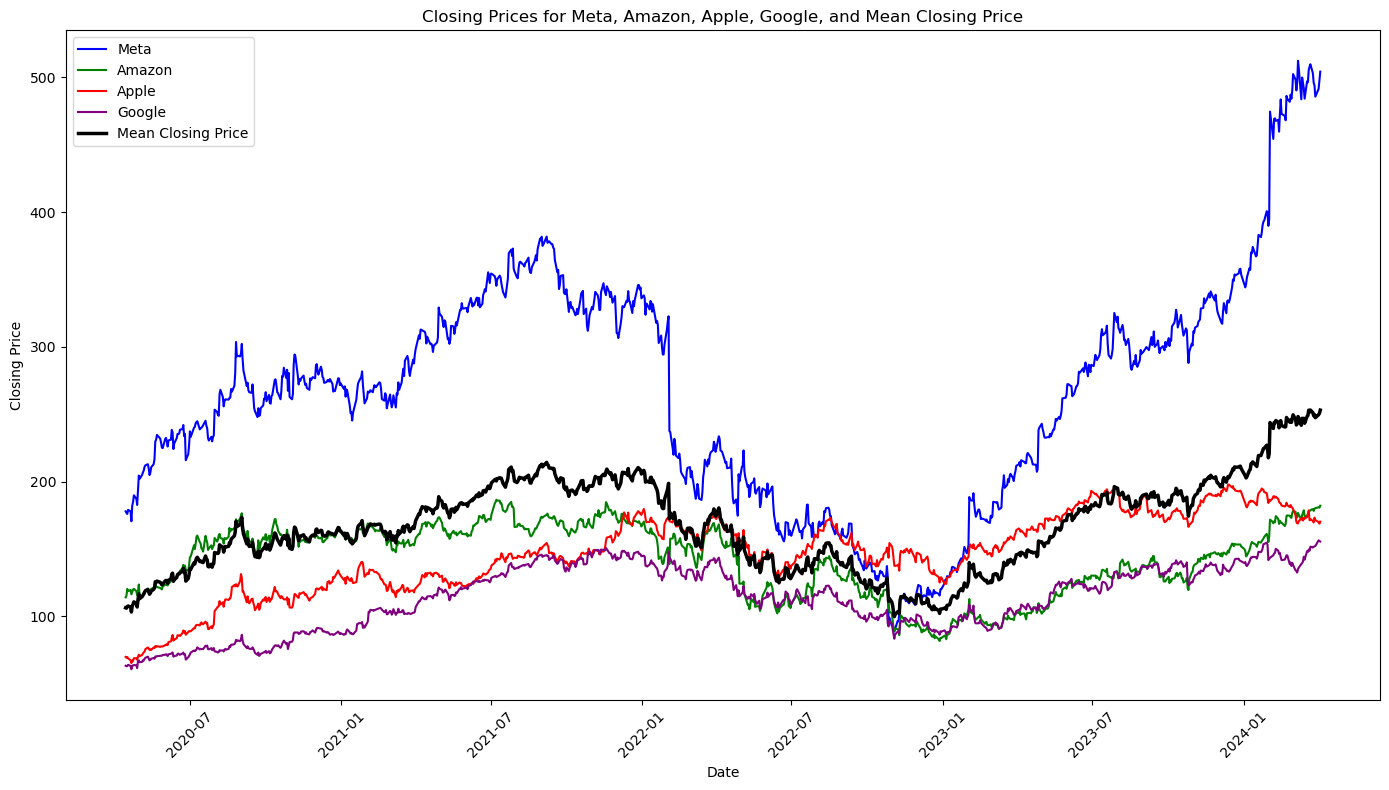

In [7]:
n_days = min(1000, len(all_stocks['Meta']['dates']))

# Plotting each stock's closing prices
plt.figure(figsize=(14, 8))

plt.plot(all_stocks['Meta']['dates'][:n_days], all_stocks['Meta']['closing price'][:n_days], label='Meta', color='blue')
plt.plot(all_stocks['Amazon']['dates'][:n_days], all_stocks['Amazon']['closing price'][:n_days], label='Amazon', color='green')
plt.plot(all_stocks['Apple']['dates'][:n_days], all_stocks['Apple']['closing price'][:n_days], label='Apple', color='red')
plt.plot(all_stocks['Google']['dates'][:n_days], all_stocks['Google']['closing price'][:n_days], label='Google', color='purple')

# Plotting the mean closing prices with a bold line
plt.plot(all_stocks['Meta']['dates'][:n_days], all_stocks['Mean_Closing_Price'][:n_days], label='Mean Closing Price', color='black', linewidth=2.5)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices for Meta, Amazon, Apple, Google, and Mean Closing Price')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## Part 2: Stacked Area Visualization (7/15 points)

Your task here is to plot two different plots. The first plot is the _stacked area chart_ of the _volumes_ of the 4 stocks. The second plot is the same, except you need to plot the _**percentage** stacked area chart_. To achieve the latter, you will need to find the percentages of the total volume for each of your stocks on each day.

Make sure to color-code your area plots so that it's easy to distinguish the stocks, and add a legend to help us identify which data represents which stock. There is no need to visualize the mean data here.

In [8]:
# Part 2: Both normal and percentage stacked area charts of the volume of the stocks for the past 1000 trading days



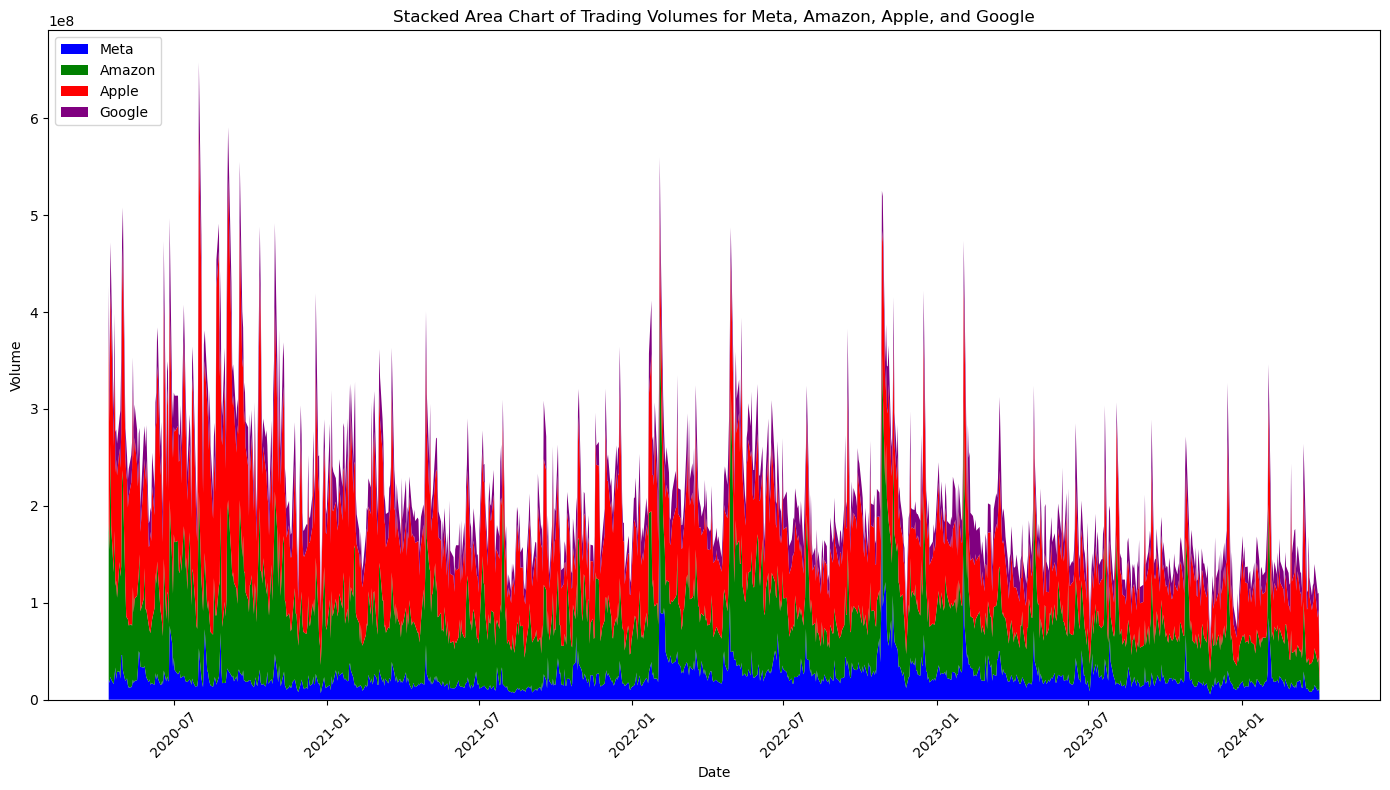

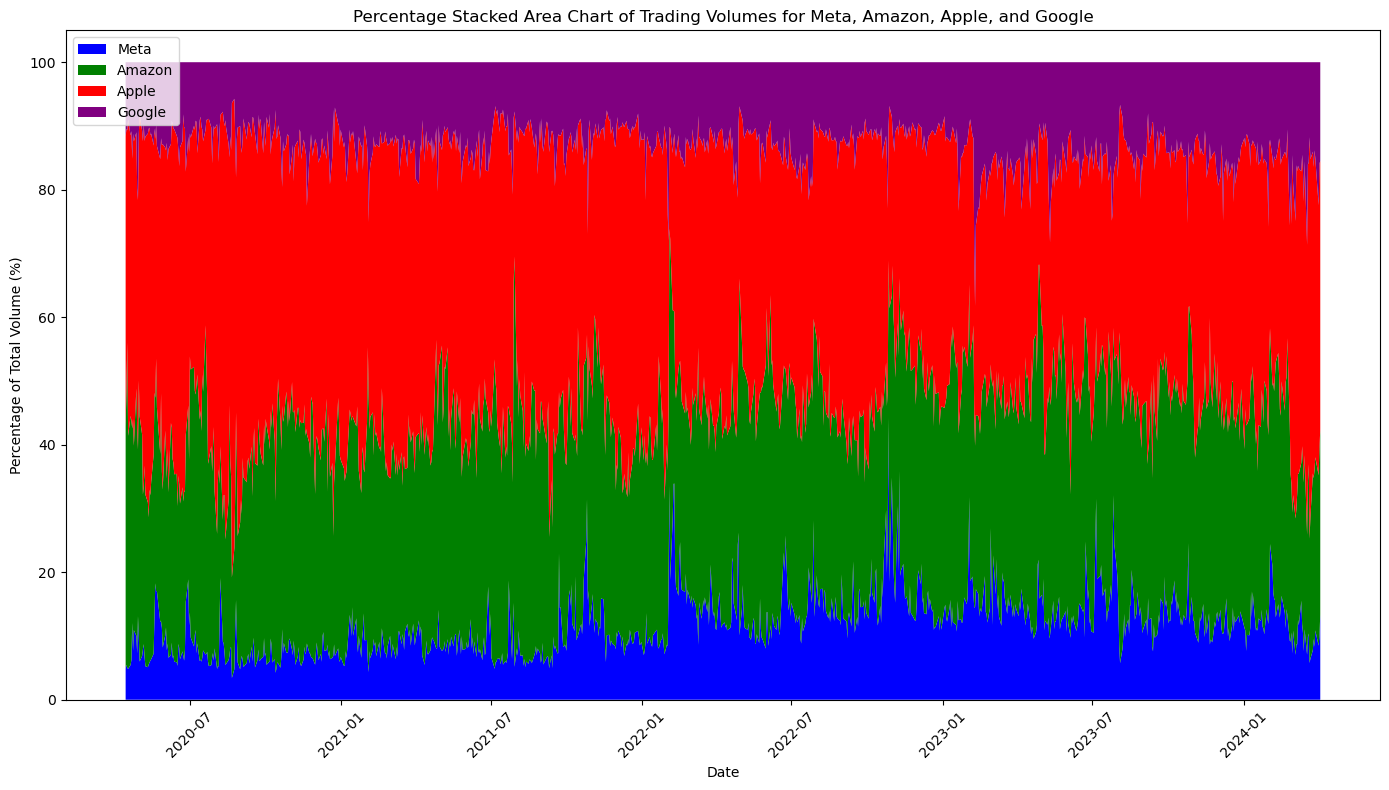

In [9]:
# Extract volumes for each stock
volumes = pd.DataFrame({
    'Meta': all_stocks['Meta']['volume'][:n_days],
    'Amazon': all_stocks['Amazon']['volume'][:n_days],
    'Apple': all_stocks['Apple']['volume'][:n_days],
    'Google': all_stocks['Google']['volume'][:n_days]
})

# Plot the actual volumes as a stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(all_stocks['Meta']['dates'][:n_days], volumes['Meta'], volumes['Amazon'], volumes['Apple'], volumes['Google'], labels=['Meta', 'Amazon', 'Apple', 'Google'], colors=['blue', 'green', 'red', 'purple'])
plt.legend(loc='upper left')
plt.title('Stacked Area Chart of Trading Volumes for Meta, Amazon, Apple, and Google')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the percentage of total volume for each stock on each day
volumes_percentage = volumes.div(volumes.sum(axis=1), axis=0) * 100

# Plot the percentage stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(all_stocks['Meta']['dates'][:n_days], volumes_percentage['Meta'], volumes_percentage['Amazon'], volumes_percentage['Apple'], volumes_percentage['Google'], labels=['Meta', 'Amazon', 'Apple', 'Google'], colors=['blue', 'green', 'red', 'purple'])
plt.legend(loc='upper left')
plt.title('Percentage Stacked Area Chart of Trading Volumes for Meta, Amazon, Apple, and Google')
plt.xlabel('Date')
plt.ylabel('Percentage of Total Volume (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 3: Meaning behind the Data? (2/15 points)

Within 2-5 sentences for each, answer the following:

1. Do you notice any trends in the closing prices of each company's stock? What might these patterns indicate regarding the performance of these tech companies? (1 point)

2. Who occupies the biggest volume percentage across the four companies? What does this tell you about the performance of these tech companies? (1 point)

Feel free to write down your analyses inside this notebook or as a standalone document.

In [10]:
# Answer for q1:


(1) The stock prices of the firms increased significantly between July 2020 and July 2021, indicating a strong bullish market. This growing tendency was most likely caused by the increased reliance on digital services and technology as a result of global events. However, after this surge, the stocks saw a severe downturn that lasted until the end of 2022, when they reached their lows. Following these lows, all stocks showed a strong bounce. Meta's stock had the most dramatic changes, rebounding from a low of around 100 dollar to a high poiny of 500 dollar per share. Meta's stock volatility might be related to specific market reactions to corporate choices, regulatory concerns, or fluctuations in overall market opinion.

(2) The early jump in stock prices demonstrates that investors were confident in these tech businesses' development potential, which was fueled by growing demand for technology and digital services.  However, the ensuing decrease may indicate overvaluation worries or corrections due to external economic factors.

In [11]:
# Answer for q2:


(1) Apple consistently has the biggest trade volume of Meta, Amazon, and Google. This large volume can be observed on multiple occasions in the data, where Apple's trading volume far outperforms that of the other businesses, frequently dramatically.

(2) Apple's high volume implies great liquidity, making it simpler for investors to purchase and sell shares without significantly impacting the price. High liquidity is frequently indicative of strong financial health and investment interest.
Market Sentiment and Activity: High trade volumes might indicate that a stock is particularly active, with substantial investor interest focused on it. This may be due to recent news, earnings releases, or other market-moving events. For Apple, this might represent its position as a market leader, with rapid product changes and high user interest.